In [9]:
from time import time
import  matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold
from sklearn.datasets import make_s_curve

In [10]:
# 生成数据
n_points = 1000
X,color = make_s_curve(n_points,random_state=0) # color 可用于颜色映射的一维变量

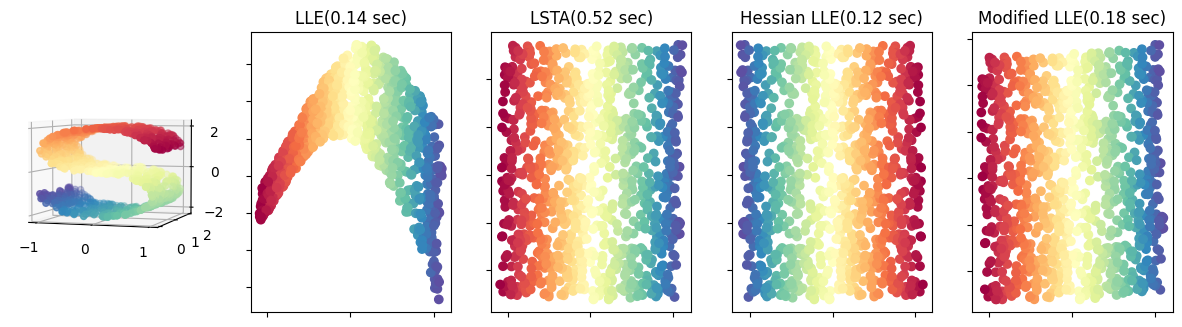

In [12]:
# 可视化原始数据
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(251,projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],c=color,cmap=plt.cm.Spectral)
ax.view_init(4,-72)


# 训练降维模型并可视化降维结果
n_neighbors = 10
n_components = 2
methods = ['standard','ltsa','hessian','modified'] # ltsa-- local tangent space alignment 局部切空间对齐
labels = ['LLE','LSTA','Hessian LLE','Modified LLE']

for i,method in enumerate(methods):    
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors,n_components=n_components,method=method).fit_transform(X)
    t1 = time()
    ax = fig.add_subplot(252+i)
    plt.scatter(Y[:,0],Y[:,1],c=color,cmap=plt.cm.Spectral)
    plt.title("%s(%.2g sec)"% (labels[i],t1-t0)) # g 自动选择最紧凑的数据表示方式
    ax.xaxis.set_major_formatter(NullFormatter()) # 去掉坐标的数据显示
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')
plt.show()
